In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [3]:
# Ignore warnings when computing divergent gradient descent trajectory
np.seterr(over='ignore')

y = 1.
h = 1.
r = 0.6
seed = 0

def loss(u, v, r):
    return ( u.T @ v - y)**2 / 2 + r * ( (u.T @ u) + (v.T @ v) ) / 2

def grad(u, v, r):
    return ( u.T @ v - y) * v + r * u, ( u.T @ v - y) * u + r * v


steps = 1000
d = 5
np.random.seed(seed)
bas1 = np.random.rand(2*d)
bas1 /= np.linalg.norm(bas1)   # Normalize 
bas2 = np.random.rand(2*d)
bas2 -= bas2.dot(bas1) * bas1  # Remove component along bas1
bas2 /= np.linalg.norm(bas2)   # Normalize

bry = 4
cor1_vals = np.linspace(-bry, bry, 600)
cor2_vals = np.linspace(-bry, bry, 600)
final_loss = []
final_coor_u = []
final_coor_v = []
final_coor = []
init_param = []
conv = []
ubound = 100
lbound = 1e-6 + (r * y - 1/2 * r**2)
for cor1 in cor1_vals:
    for cor2 in cor2_vals:
        vec = cor1 * bas1 + cor2 * bas2
        u = vec[:d].reshape(-1,1)
        v = vec[d:].reshape(-1,1)
        init_param.append((cor1,cor2))
        for _ in range(steps):
            graduv = grad(u,v,r)
            u -= h * graduv[0]
            v -= h * graduv[1]
            l = loss(u, v, r).item()
            if l>ubound or l<lbound:
                break
        final_loss.append(l)
        final_coor_u.append(u.T @ u)
        final_coor_v.append(v.T @ v)
        final_coor.append(u[0])
    #print(cor1)

init_param = np.array(init_param)
final_coor_u = np.array(final_coor_u).reshape(-1)
final_coor_v = np.array(final_coor_v).reshape(-1)
final_coor = np.array(final_coor).reshape(-1)



x1, x2 = -1.2-0.2, -1.2+0.2
y1, y2 = -2-0.2, -2+0.2

cor1_zoom = np.linspace(x1, x2, 400)
cor2_zoom = np.linspace(y1, y2, 400)
zoom_init_param = []
zoom_coor = []
zoom_init_param_div = []

for cor1 in cor1_zoom:
    for cor2 in cor2_zoom:
        vec = cor1 * bas1 + cor2 * bas2
        u = vec[:d].reshape(-1,1)
        v = vec[d:].reshape(-1,1)
        for _ in range(steps):
            graduv = grad(u, v, r)
            u -= h * graduv[0]
            v -= h * graduv[1]
            l = loss(u, v, r).item()
            if l > ubound or l < lbound:
                break
        if l < lbound:
            zoom_init_param.append((cor1,cor2))
            zoom_coor.append(u[0])
        else:
            zoom_init_param_div.append((cor1,cor2))

zoom_init_param = np.array(zoom_init_param)
zoom_init_param_div = np.array(zoom_init_param_div)
zoom_coor = np.array(zoom_coor).reshape(-1)

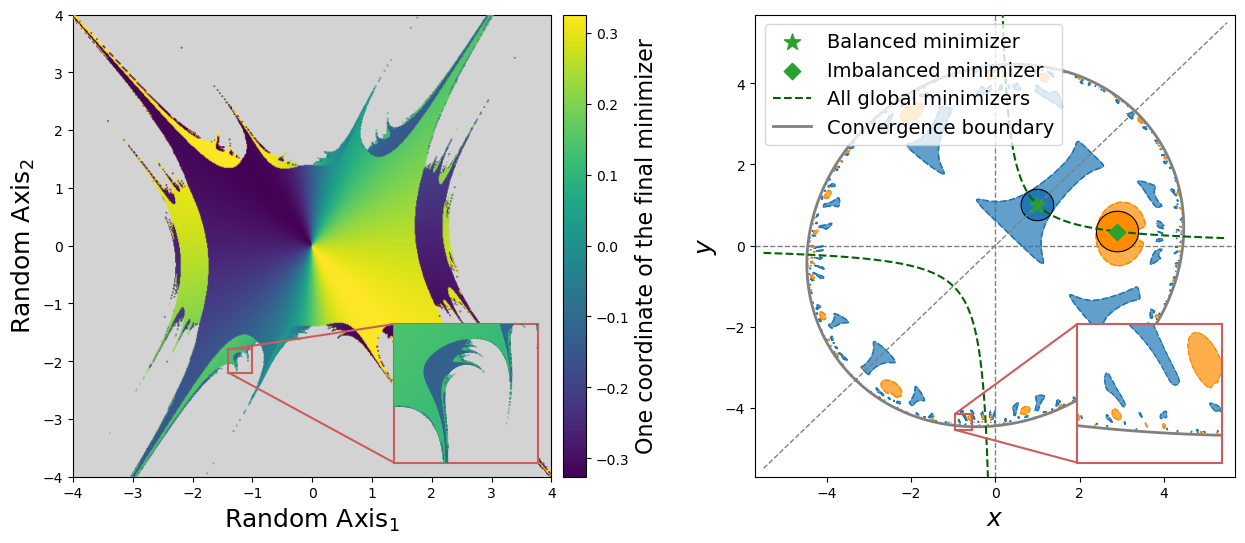

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6) , gridspec_kw={'width_ratios': [1.2, 1]})

FS = 16
ax=axs[0]

final_coor_ult = final_coor

mask = np.array(final_loss) < lbound
init_param_masked = init_param[mask]
init_param_unmasked = init_param[~mask]
final_coor_masked = final_coor_ult[mask]

ax.scatter(init_param_masked[:, 0], init_param_masked[:, 1], c=final_coor_masked, cmap='viridis', s=.1, zorder=10)
ax.scatter(init_param_unmasked[:, 0], init_param_unmasked[:, 1], c='lightgray', s=.1)
fig.colorbar(ax.collections[0], ax=ax, location='right', pad=0.02, shrink=1.0).set_label('One coordinate of the final minimizer', fontsize=FS, rotation=90)


from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=1)
for spine in inset_ax.spines.values():
    spine.set_edgecolor('indianred')
    spine.set_linewidth(1.5)


inset_ax.scatter(
    zoom_init_param[:, 0], 
    zoom_init_param[:, 1], 
    c=zoom_coor, 
    s=.05,
    zorder=10,
)

inset_ax.scatter(
    zoom_init_param_div[:, 0], 
    zoom_init_param_div[:, 1], 
    c='lightgray', 
    s=.05,
)

inset_ax.set_xlim(x1, x2)
inset_ax.set_ylim(y1, y2)
inset_ax.set_xticks([])
inset_ax.set_yticks([])

main_scatter = ax.collections[0]
inset_ax.collections[0].set_cmap(main_scatter.get_cmap())
inset_ax.collections[0].set_norm(main_scatter.norm)

mark_inset(ax, inset_ax, loc1=2, loc2=3, fc="none", ec="indianred", lw=1.5, zorder=20)


bry = 4
ax.set_xlabel('Random Axis$_1$', fontsize=FS+2)
ax.set_ylabel('Random Axis$_2$', fontsize=FS+2)
ax.set_xlim(-bry, bry)
ax.set_ylim(-bry, bry)







ax=axs[1]
y = 1.
h = 0.2
r = 0.0


ax.axhline(0, color='gray', linestyle='--', linewidth=1, zorder=0)
ax.axvline(0, color='gray', linestyle='--', linewidth=1, zorder=0)



def GD(u, v, h, y):
    z = u * v - y
    u_new = u - h * z * v
    v_new = v - h * z * u
    return u_new, v_new


p1, q1 = 1.0, 1/1.0  
r = 0.15            
bry = 4.5

p2, q2 = 2.9, y/2.9
r2 = 0.25

u = np.linspace(-bry, bry, 800)
v = np.linspace(-bry, bry, 800)
U, V = np.meshgrid(u, v)


U_flat = U.flatten()
V_flat = V.flatten()
U_gd = U_flat.copy()
V_gd = V_flat.copy()
for _ in range(6):
    U_gd, V_gd = GD(U_gd, V_gd, h, y)


F = (U_gd - p1)**2 + (V_gd - q1)**2
F = F.reshape(U.shape)

F2 = (U_gd - p2)**2 + (V_gd - q2)**2
F2 = F2.reshape(U.shape)


ax.contourf(U, V, F, levels=[0, r], colors='tab:blue', alpha=.7, zorder=3)
ax.contourf(U, V, F2, levels=[0, r2], colors='darkorange', alpha=.7, zorder=3)
ax.contour(U, V, F, levels=[r], colors='tab:blue', linestyles='dashed', linewidths=1.2, zorder=3)
ax.contour(U, V, F2, levels=[r2], colors='darkorange', linestyles='dashed', linewidths=1.2, zorder=3)


Q = U**2 + V**2 + np.sqrt((U**2 + V**2)**2 - 16*y*(U*V - y))
ax.contour(U, V, Q, levels=[8/h], colors='gray', linewidths=2, linestyles='solid', zorder=5)


G = (U - p1)**2 + (V - q1)**2
G = G.reshape(U.shape)

G2 = (U - p2)**2 + (V - q2)**2
G2 = G2.reshape(U.shape)

ax.contourf(U, V, G, levels=[0, r], colors='tab:blue', alpha=1., zorder=3)
ax.contourf(U, V, G2, levels=[0, r2], colors='darkorange', alpha=1., zorder=3)
ax.contour(U, V, G, levels=[r], colors='k', linestyles='-', linewidths=.8, zorder=4)
ax.contour(U, V, G2, levels=[r2], colors='k', linestyles='-', linewidths=.8, zorder=4)


# two minima
ax.scatter(p1,q1, color='tab:green', s=150, marker='*', zorder=30, label='Balanced minimizer')
ax.scatter(p2, q2, color='tab:green', s=70, marker='D', zorder=30, label='Imbalanced minimizer')


# all minima
x_vals_neg = np.linspace(-bry-1, -1e-10, 500)
x_vals_pos = np.linspace(1e-10, bry+1, 500)
ax.plot(x_vals_neg, 1/x_vals_neg, color='darkgreen', linewidth=1.5, label='All global minimizers', zorder=5, linestyle='dashed')
ax.plot(x_vals_pos, 1/x_vals_pos, color='darkgreen', linewidth=1.5, zorder=5, linestyle='dashed')

# y=x
ax.plot(np.linspace(-bry-1, bry+1), np.linspace(-bry-1, bry+1), color='gray', linewidth=1., zorder=20, linestyle='dashed')


ax.set_xlim(-bry-1.2, bry+1.2)
ax.set_ylim(-bry-1.2, bry+1.2)

ax.set_xlabel(r'$x$', fontsize=FS+2)
ax.set_ylabel(r'$y$', fontsize=FS+2)
ax.legend(fontsize=FS-2, loc='upper left')


## inset
xx1,xx2=-.75-0.2  , -.75+0.2
yy1,yy2=-4.35-0.2, -4.35+0.2

inset_ax = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=1)
for spine in inset_ax.spines.values():
    spine.set_edgecolor('indianred')
    spine.set_linewidth(1.5)

inset_ax.contour(U, V, Q, levels=[8/h], colors='gray', linewidths=2, linestyles='solid', zorder=5)



U_inset = np.linspace(xx1, xx2, 500)
V_inset = np.linspace(yy1, yy2, 500)
U_inset, V_inset = np.meshgrid(U_inset, V_inset)


U_flat = U_inset.flatten()
V_flat = V_inset.flatten()
U_gd = U_flat.copy()
V_gd = V_flat.copy()
for _ in range(6):
    U_gd, V_gd = GD(U_gd, V_gd, h, y)

F = (U_gd - p1)**2 + (V_gd - q1)**2
F = F.reshape(U_inset.shape)

F2 = (U_gd - p2)**2 + (V_gd - q2)**2
F2 = F2.reshape(U_inset.shape)


inset_ax.contourf(U_inset, V_inset, F, levels=[0, r], colors='tab:blue', alpha=.7, zorder=2)
inset_ax.contourf(U_inset, V_inset, F2, levels=[0, r2], colors='darkorange', alpha=.7, zorder=2)
inset_ax.contour(U_inset, V_inset, F, levels=[r], colors='tab:blue', linestyles='--', linewidths=1., zorder=2)
inset_ax.contour(U_inset, V_inset, F2, levels=[r2], colors='darkorange', linestyles='--', linewidths=1., zorder=2)




inset_ax.set_xlim(xx1, xx2)
inset_ax.set_ylim(yy1, yy2)
inset_ax.set_xticks([])
inset_ax.set_yticks([])


contour_legend = Line2D([0], [0], color='gray', linewidth=2, linestyle='solid', label='Convergence boundary', zorder=100)


ax.legend(handles=ax.get_legend_handles_labels()[0] + [contour_legend],
          labels=ax.get_legend_handles_labels()[1] + ['Convergence boundary'],
          fontsize=FS-2, loc='upper left')


mark_inset(ax, inset_ax, loc1=2, loc2=3, fc="none", ec="indianred", lw=1.5, zorder=20)

plt.savefig('output/Intro.png', bbox_inches='tight', dpi=300)


In [5]:
import matplotlib
print(matplotlib.__version__)

3.5.2
